## Exercise - DL Tutorial 09

### Student names:

Submit you solution by 07 July 23:59 to manuel.milling@informatik.uni-augsburg.de or maurice.gerczuk@informatik.uni-augsburg.de

In [9]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, LeakyReLU, Flatten, Reshape, BatchNormalization
from tensorflow.keras.layers import Conv2D, UpSampling2D, Reshape,  MaxPooling2D, Conv2DTranspose
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import os
import glob
import scipy.misc
from IPython.display import clear_output, Image
import math

### Ring GAN

In [10]:
# Objective function; Achieve at least .8 with the test vector
def ring_objective(preds):
    dists = np.sqrt(preds[:, 0] ** 2 + preds[:, 1] ** 2).reshape(-1)
    return np.mean(np.where(np.abs(dists - 1) <= 0.1, 1, 0))

In [11]:
SAMPLE_DIM = 2
ITERATIONS = 16001
CIRCLE_RADIUS = 1

Define discriminator architecture.

In [12]:
def discriminator():
    model = Sequential(name='discriminator')
    model.add(Dense(32, input_dim=SAMPLE_DIM))
    model.add(LeakyReLU())
    model.add(Dense(16))
    model.add(LeakyReLU())
    model.add(Dense(4))
    model.add(LeakyReLU())
    model.add(Dense(1, activation='sigmoid'))
    return model

Define generator architecture.

In [13]:
def generator():
    net = Sequential(name='generator')
    net.add(Dense(32, input_dim=SAMPLE_DIM))
    net.add(LeakyReLU())
    net.add(Dense(16))
    net.add(LeakyReLU())
    net.add(Dense(4))
    net.add(LeakyReLU())
    net.add(Dense(2))
    return net

Define and compile GAN architecture.

In [14]:
generator = generator()
discriminator = discriminator()


optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
discriminator.trainable = False

generator.compile(loss='mse', optimizer=optimizer)

gan = Sequential(name='gan')
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

generator.summary()
discriminator.summary()
gan.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                96        
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 68        
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 4)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 10

Generate training data.

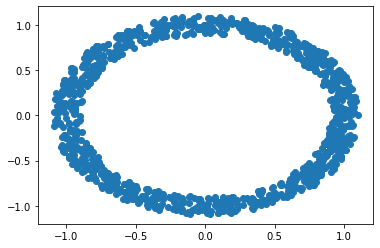

In [15]:
angles = np.random.uniform(0, 2 * math.pi, size=[1024, 1])
r_rads = np.random.uniform(0.9, 1.1, size=[1024, 1])
x_train = np.hstack((np.cos(angles) * CIRCLE_RADIUS * r_rads, np.sin(angles) * CIRCLE_RADIUS * r_rads))


plt.scatter(x_train[:, 0], x_train[:, 1])

plt.show()

Train GAN.

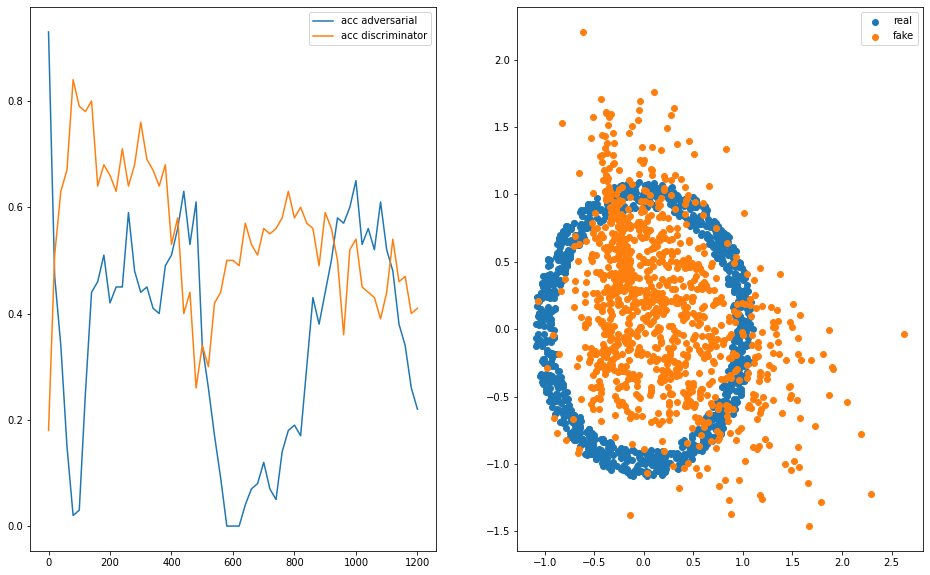

Objective score: 0.105


In [16]:
vis_noise = np.random.normal(0, 1.0, size=[1000, SAMPLE_DIM])

acc_adv = []
acc_dis = []
plot_iteration = []
batch_size = 100

fake_labels = np.zeros((batch_size // 2, 1))
real_labels = np.ones((batch_size // 2, 1))
combined_labels = np.vstack((real_labels, fake_labels))
real_label_gan = np.ones((batch_size, 1))

for i in range(ITERATIONS):

    # TODO: Add GAN training.
    
    # Train the discriminator
    idx = np.random.randint(0, x_train.shape[0], batch_size // 2)
    real_data = x_train[idx]
    gen_data = generator.predict(np.random.normal(0, 1.0, size=[batch_size // 2, SAMPLE_DIM]))
    combined_data = np.vstack((real_data, gen_data))
    discriminator_stats = discriminator.train_on_batch(combined_data, combined_labels)

    noise = np.random.normal(0, 1.0, size=[batch_size, SAMPLE_DIM])
    adversarial_stats = gan.train_on_batch(noise, real_label_gan)
    
    # Visualization: Plot the accuracy of the discriminator and the adversarial setup + the
    # predicted point cloud from the test vector.
    if i % 20 == 0:
        plot_iteration.append(i)
        # Don't forget to include the accuracy metric when compiling the models.
        acc_adv.append(adversarial_stats[1])
        acc_dis.append(discriminator_stats[1])

        clear_output(wait=True)

        fig, axes = plt.subplots(1,2)
        fig.set_size_inches(16, 10)

        axes[0].plot(plot_iteration, acc_adv, label="acc adversarial")
        axes[0].plot(plot_iteration, acc_dis, label="acc discriminator")
        axes[0].legend()

        # Visualize the performance of the generator by producing samples from the test vector.
        generated = generator.predict(vis_noise)

        axes[1].scatter(x_train[:,0], x_train[:,1], label="real")
        axes[1].scatter(generated[:,0], generated[:,1], label="fake")
        axes[1].legend()
        plt.show()

        print("Objective score:", ring_objective(generated))


### MNIST GAN

In [ ]:
ITERATIONS = 10001
# I suggest using uniform random noise vectors of size 100.
SAMPLE_DIM = 100

Define discriminator architecture.

In [ ]:
def discriminator():
    pass

Define generator architecture.

In [ ]:
def generator():
    pass

Load mnist training data.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train = input_data.read_data_sets("mnist", one_hot=True).train.images
x_train = x_train.reshape(-1, 28, 28, 1).astype(np.float32)

In [ ]:
images = x_train[140:160]

plt.figure(figsize=(25, 5))

for im in range(images.shape[0]):
    plt.subplot(2, 10, im + 1)
    image = images[im, :, :, :]
    image = np.reshape(image, [28, 28])

    plt.imshow(image, cmap='gray')
    plt.axis('off')

Train GAN.

In [ ]:
loss_adv = []
loss_dis = []
acc_adv = []
acc_dis = []
plot_iteration = []


test_noise = np.random.uniform(-1.0, 1.0, size=[10, SAMPLE_DIM])


for i in range(ITERATIONS):

    # TODO: Add GAN training.


    if i % 50 == 0:

        clear_output(wait=True)

        plot_iteration.append(i)
        loss_adv.append(a_stats[0])
        loss_dis.append(d_stats[0])
        acc_adv.append(a_stats[1])
        acc_dis.append(d_stats[1])

        fig, ax = plt.subplots(1,2)
        fig.set_size_inches(16, 8)

        ax[0].plot(plot_iteration, loss_adv, label="loss adversarial")
        ax[0].plot(plot_iteration, loss_dis, label="loss discriminator")
        ax[0].legend()
        ax[0].set_ylim(top=2)

        ax[1].plot(plot_iteration, acc_adv, label="Accuracy adversarial")
        ax[1].plot(plot_iteration, acc_dis, label="Accuracy discriminator")
        ax[1].legend()
        
        test_samples = net_generator.predict(test_noise)
        
        
        plt.figure(figsize=(20,10))

        for im in range(test_samples.shape[0]):
            plt.subplot(1, 10, im+1)
            image = test_samples[im, :, :, :]
            image = np.reshape(image, [28, 28])

            plt.imshow(image, cmap='gray')
            plt.axis('off')

        plt.show()
